# KNN-阿凯的机器学习玩具代码


## 鸢尾花数据集

![u=2711639257,742490474&fm=27&gp=0.jpg](./IMG/u=2711639257,742490474&fm=27&gp=0.jpg)

  鸢尾花数据是一个简易有趣的数据集。这个数据集来源于科学家在一岛上找到一种花的三种不同亚类别，分别叫做iris setosa, iris versicolor,iris virginica。但是这三个种类并不是很好分辩，所以他们又从花萼长度(sepal length)，花萼宽度(sepal width)，花瓣长度(petal length)，花瓣宽度(petal width)这四个角度测量不同的种类用于定量分析。基于这四个特征，这些数据成了一个多重变量分析的数据集。在sklearn中预置了鸢尾花（iris）的数据集， 我们可以直接导入， 每种各有50个样本，target（目标分类）数据分别为0,1,2

![iris_data_table.jpg](./IMG/iris_data_table.jpg)

In [1]:
# 导入数据库
from sklearn import datasets
# 从数据库中载入iris样本
iris = datasets.load_iris()

X = iris.data
y = iris.target

In [2]:
# 打印前10组特征
X[:10]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [3]:
# 打印前10个数据的标签
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

为了讲解KNN算法， 我们先从最简单的2D数据开始讲解。所以我们可以从iris数据集中选取两组特征值，例如花萼长度(sepal length)，花萼宽度(sepal width）。因为只选取了其中的两维数据， 信息肯定是丢失的，所以不必纠结与最后的准确率。

In [4]:
data = X[:,:2]
data[:10]

array([[ 5.1,  3.5],
       [ 4.9,  3. ],
       [ 4.7,  3.2],
       [ 4.6,  3.1],
       [ 5. ,  3.6],
       [ 5.4,  3.9],
       [ 4.6,  3.4],
       [ 5. ,  3.4],
       [ 4.4,  2.9],
       [ 4.9,  3.1]])

In [5]:
# 打乱排序
import numpy as np
n_sample = len(data)
# 初始化排序
idxs = np.arange(n_sample)
# 打乱排序
np.random.shuffle(idxs)

data = data[idxs]
target = y[idxs]

In [6]:
target

array([0, 2, 1, 2, 0, 2, 0, 2, 2, 0, 2, 1, 0, 2, 2, 2, 1, 1, 2, 0, 0, 2, 1,
       0, 2, 1, 1, 2, 0, 0, 2, 1, 1, 0, 2, 1, 0, 0, 1, 2, 2, 0, 2, 2, 2, 1,
       1, 1, 2, 2, 1, 1, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 1, 2, 2, 1, 1, 0, 1,
       0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 2, 0, 1, 2, 1, 0, 1,
       1, 1, 0, 2, 0, 0, 2, 2, 2, 0, 1, 2, 0, 2, 2, 0, 1, 0, 1, 2, 1, 2, 0,
       0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 2, 1, 2, 2, 0, 2, 1, 1, 1, 0, 2, 0, 2,
       1, 0, 2, 0, 1, 1, 0, 1, 2, 1, 1, 2])

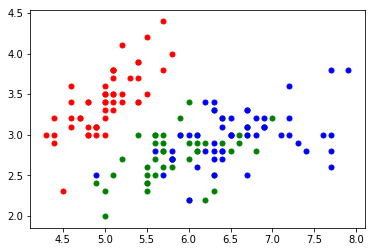

In [7]:
from matplotlib import pyplot as plt

def drawData(data, target):
    targetColorDict = {
        0: 'red',
        1: 'green',
        2: 'blue'
    }

    for t,color in targetColorDict.items():
        idxs = np.argwhere(target == t)
        idxs.resize(len(idxs))
        plt.scatter(data[idxs][:,0],data[idxs][:,1],s=25,marker='o', c=targetColorDict[t])

    plt.show()
    
drawData(data, target)

## 数据归一化

如果维度之间的数值的差别很大的话， 不能直接进行距离计算，例如这样的

$$distance = \sqrt{(0-67)^2 + (20000 - 32000)^2 + (1.1 - 0.1)^2}$$

需要对其进归一化（normalized）， 将数值范围放缩到0-1之间。
$$newValue = (oldValue - minValue) / (maxValue - minValue)$$

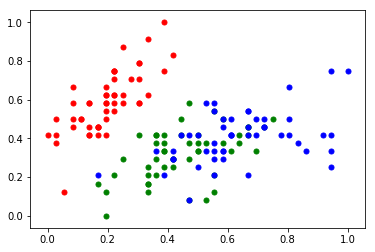

In [8]:
def Normalize(data):
    '''
    对数据进行归一化处理
    '''
    n_dimension = len(data[0])
    new_data = np.copy(data)
    
    for d_idx in range(n_dimension):
        minValue = np.min(data[:,d_idx])
        maxValue = np.max(data[:,d_idx])
        new_data[:,d_idx] = (data[:,d_idx] - minValue)/(maxValue - minValue)
    return new_data

data = Normalize(data)
drawData(data, target)

## 距离计算公式 - 欧式距离

实际上，距离计算的方法有很多种，例如欧式距离，汉明距离等等，详细的距离计算方法，大家可以参考一下博客[各种距离算法](http://blog.csdn.net/a_12_123_1234_12345/article/details/78857062). 这里我们只讲解欧式距离。
实际上，我们在平面几何中， 计算距离采用的就是欧式距离。

![1353398777_7638.png](./IMG/1353398777_7638.png)

在2D平面上， 点$(x_1, y_1), (x_2, y_2)$之间的距离计算公式为：

$$d = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$$


In [9]:
def EuclideanDistance(data, vect):
    '''
    计算一个点与其他点集的距离，输出一个距离列表
    '''
    return np.sqrt(((data-vect)**2).sum(axis=1))

EuclideanDistance(data, np.array([0.5, 0.5]))

array([ 0.20833333,  0.13678969,  0.16197089,  0.17179607,  0.30460711,
        0.13888889,  0.29000851,  0.29000851,  0.33592741,  0.50689688,
        0.39771725,  0.41036908,  0.45069391,  0.08333333,  0.47466687,
        0.22438187,  0.58597286,  0.2003084 ,  0.17179607,  0.34359214,
        0.30838338,  0.186339  ,  0.2003084 ,  0.38888889,  0.21561354,
        0.12804923,  0.25609846,  0.25      ,  0.48848626,  0.37060178,
        0.35600016,  0.17179607,  0.41759157,  0.3167154 ,  0.13888889,
        0.22438187,  0.33592741,  0.51219691,  0.32542707,  0.16896563,
        0.21154925,  0.47222222,  0.17179607,  0.22609473,  0.08784105,
        0.21154925,  0.1001542 ,  0.06944444,  0.50993222,  0.30555556,
        0.22438187,  0.12804923,  0.37371178,  0.28088539,  0.30460711,
        0.06944444,  0.30555556,  0.3167154 ,  0.08784105,  0.50993222,
        0.37060178,  0.30460711,  0.33592741,  0.22222222,  0.1001542 ,
        0.372678  ,  0.17179607,  0.37371178,  0.21017703,  0.31

## K最近邻算法的实现

为了讲解KNN，同时也因为KNN模型足够简单，所以阿凯打算先讲解如何自己动手DIY KNN算法。
前面讲解了获取一个点距离数据集的所有距离的集合，所以在KNN函数中，需要做的就是需要提取前K个最小距离的数据并统计他们所属的类，最后输出最多的类。

In [10]:
# 拟定一个测试点 坐标是0.5 0.5
vect = np.array([0.5, 0.5])
# K设定为5
K = 5
# 获取距离列表
distance = EuclideanDistance(data, vect)
print(distance)

[ 0.20833333  0.13678969  0.16197089  0.17179607  0.30460711  0.13888889
  0.29000851  0.29000851  0.33592741  0.50689688  0.39771725  0.41036908
  0.45069391  0.08333333  0.47466687  0.22438187  0.58597286  0.2003084
  0.17179607  0.34359214  0.30838338  0.186339    0.2003084   0.38888889
  0.21561354  0.12804923  0.25609846  0.25        0.48848626  0.37060178
  0.35600016  0.17179607  0.41759157  0.3167154   0.13888889  0.22438187
  0.33592741  0.51219691  0.32542707  0.16896563  0.21154925  0.47222222
  0.17179607  0.22609473  0.08784105  0.21154925  0.1001542   0.06944444
  0.50993222  0.30555556  0.22438187  0.12804923  0.37371178  0.28088539
  0.30460711  0.06944444  0.30555556  0.3167154   0.08784105  0.50993222
  0.37060178  0.30460711  0.33592741  0.22222222  0.1001542   0.372678
  0.17179607  0.37371178  0.21017703  0.3167154   0.37060178  0.37371178
  0.34805456  0.44876373  0.18685589  0.35053971  0.33592741  0.41759157
  0.2795085   0.08333333  0.25        0.37060178  0.26

In [11]:
# 获取排序从小到大对应的编号 并截取前K个index
kn_idxs = distance.argsort()[:K]
kn_idxs

array([126,  55,  47, 120,  79])

In [12]:
import collections

# 获取前K个邻居的标签
kn_labels = target[kn_idxs]

print(kn_labels)

[1 2 1 1 1]


In [13]:
# 对标签进行统计
kn_labels_stat = dict(collections.Counter(kn_labels))
print(kn_labels_stat)

{1: 4, 2: 1}


In [14]:
# 获取数量最高的标签
predict = max(kn_labels_stat, key=lambda x: kn_labels_stat[x])
print(predict)

1


In [15]:
def KNN(data, vect, K=3):
    '''
    K 邻近算法的实现
    '''
    distance = EuclideanDistance(data, vect)
    kn_idxs = distance.argsort()[:K]
    # 获取前K个邻居的标签
    kn_labels = target[kn_idxs]
    # 对标签进行统计
    kn_labels_stat = dict(collections.Counter(kn_labels))
    # 获取数量最高的标签
    predict = max(kn_labels_stat, key=lambda x: kn_labels_stat[x])
    return predict


In [16]:

# 拟定一个测试点 坐标是0.5 0.5
vect = np.array([0.5, 0.5])
# K设定为5
K = 5

KNN(data, vect, K)

1

## 预测效果检验

划分训练集跟测试集, 使用80%的数据作为训练集， 剩下的20%作为测试集。

**注意：KNN没有预先训练模型的过程**， 这个模型比较**懒**, 每次判断一个点类型的时候，是将这个点跟训练集中的每个样本一一比较，然后选取前K个比较邻近的。 类似这种的学习方式被称之为**Lazy Learning 懒式学习** '有点像是平时不努力学习功课，到了考前才开始临时抱佛脚的感觉。'

In [17]:
# 训练集
X_train = data[:120]
y_train = target[:120]
# 测试集
X_test = data[120:]
y_test = target[120:]

def evaluateModel(X_train, y_train, X_test, y_test, K=1):
    y_predict = np.ones_like(y_test)
    n_test = len(y_test)
    
    for idx in range(n_test):
        vect = X_test[idx]
        predict = KNN(data, vect, K)
        y_predict[idx] = predict
    
    # 准确率
    accuracy = np.count_nonzero(y_predict == y_test) / n_test
    return accuracy


accuracy = evaluateModel(X_train,y_train, X_test, y_test,K=5)
print("准确率：　%.2f"%(accuracy))

准确率：　0.80


## 可视化



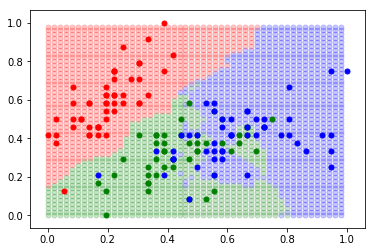

In [18]:
import itertools


targetColorDict = {
    0: 'red',
    1: 'green',
    2: 'blue'
}

# 绘制预测点
for pt in itertools.product(np.arange(0,1,0.02), np.arange(0,1,0.02)):
    t = KNN(data, np.array([pt[0], pt[1]]), K)
    plt.scatter(np.array([pt[0]]),np.array([pt[1]]),s=25,marker='o', c=targetColorDict[t],alpha=0.2)

# 绘制数据点
for t,color in targetColorDict.items():
    idxs = np.argwhere(target == t)
    idxs.resize(len(idxs))
    plt.scatter(data[idxs][:,0],data[idxs][:,1],s=25,marker='o', c=targetColorDict[t])


plt.show()
    

    

## 引入四维数据

之前我们只采用了两维数据，现在，我们可以引入四维数据：　花萼长度(sepal length)，花萼宽度(sepal width)，花瓣长度(petal length)，花瓣宽度(petal width)

In [19]:
X = iris.data
y = iris.target

n_sample = len(y)

# 初始化排序
idxs = np.arange(n_sample)
# 打乱排序
np.random.shuffle(idxs)

data = data[idxs]
target = y[idxs]

# 训练集
X_train = data[:120]
y_train = target[:120]
# 测试集
X_test = data[120:]
y_test = target[120:]

In [20]:
accuracy = evaluateModel(X_train,y_train, X_test, y_test,K=1)
print("准确率：　%.2f"%(accuracy))

准确率：　0.87


K=  1; Accuracy: 0.87
K=  3; Accuracy: 0.87
K=  5; Accuracy: 0.73
K=  7; Accuracy: 0.70
K=  9; Accuracy: 0.50
K=  11; Accuracy: 0.40


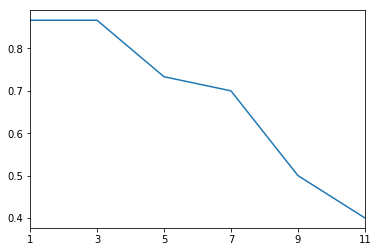

In [24]:
k_list = np.arange(1, 13, 2)
result = []
for K in k_list:
    accuracy = evaluateModel(X_train,y_train, X_test, y_test,K=K)
    result.append(accuracy)
    print('K=  %d; Accuracy: %.2f'%(K, accuracy))

plt.xticks(k_list)
plt.xlim(1, 11)
plt.plot(k_list,result)
plt.show()

通过上图中的数据，　我们不难看出，针对鸢尾花数据集，K=1的时候，准确率最高．

其实机器学习的准确率并不是唯一的评价模型的标准，只不过阿凯在教程里目前只提到了这一种，在之后的学习过程中，我们会逐渐提到更多的模型评价指标，例如roc等．

## Summary 总结

**KNN优点**
原理比较简单，无需参数估计，没有训练过程，针对多分类问题比较好．

**KNN缺点**
之前提到过，KNN算法属于惰性学习，每次输入样本的时候，需要匹配所有．因此如果样本量很多的话，计算量就会非常高.

